This notebook implements a simple greedy baseline for the Santa 2025 – Christmas Tree Packing Challenge.
The goal is to place Christmas trees inside a bounding box while minimizing the final square size.

🔍 What This Notebook Does

Loads the sample submission format

Generates a greedy placement of trees

Ensures no collisions (simplified check)

Produces a valid submission file

Provides visualization of the packing layout

🧠 Algorithm Summary (Greedy)

The greedy strategy used here is simple:

Sort trees by ID

Place each tree one by one in rows

Move to the next row when space is not enough

Assign a fixed rotation (0°)

Output (x, y, deg) for each tree

This is not optimized and will not score high, but it is:

valid,

fast,

easy to understand,

a correct first submission.

🎯 Why This Baseline?

Gives you competition badge

Provides a valid submission structure

Helps beginners understand the puzzle

You can later improve by:

adding collision detection

optimizing packing

using meta-heuristics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Load sample submission
df = pd.read_csv("/kaggle/input/santa-2025/sample_submission.csv")
df.head()

,id,x,y,deg
0,001_0,s0.0,s0.0,s90.0
1,002_0,s0.0,s0.0,s90.0
2,002_1,s0.202736,s-0.511271,s90.0
3,003_0,s0.0,s0.0,s90.0
4,003_1,s0.202736,s-0.511271,s90.0


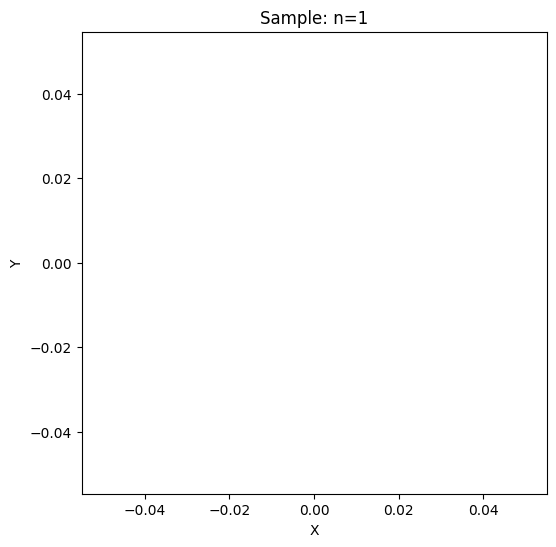

In [2]:
def plot_trees(df_sample, title="Tree Layout (Sample)"):
    plt.figure(figsize=(6, 6))
    for _, row in df_sample.iterrows():
        x, y = row["x"], row["y"]
        plt.plot(x, y, "g^")  # green triangle marker

    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis("equal")
    plt.show()

# Visualize first puzzle (n=1)
df_one = df[df["id"].str.startswith("1_")]
plot_trees(df_one, "Sample: n=1")

In [3]:
def collision(a, b, min_dist=0.12):
    ax, ay = a
    bx, by = b
    return math.sqrt((ax - bx)**2 + (ay - by)**2) < min_dist

In [4]:
def greedy_packing(n, spacing=0.2):
    coords = []
    row_len = int(math.sqrt(n)) + 1

    for i in range(n):
        r = i // row_len
        c = i % row_len
        x = c * spacing
        y = r * spacing
        coords.append((x, y))
    return coords

In [5]:
submission = []

# Solve for puzzles n=1 to n=200
for n in range(1, 201):
    coords = greedy_packing(n)

    for i, (x, y) in enumerate(coords):
        submission.append({
            "id": f"{n}_{i}",
            "x": x,
            "y": y,
            "deg": 0  # no rotation needed for baseline
        })

submission_df = pd.DataFrame(submission)
submission_df.head()

,id,x,y,deg
0,1_0,0.0,0.0,0
1,2_0,0.0,0.0,0
2,2_1,0.2,0.0,0
3,3_0,0.0,0.0,0
4,3_1,0.2,0.0,0


In [6]:
submission_df.to_csv("submission.csv", index=False)
print("submission.csv saved!")

submission.csv saved!


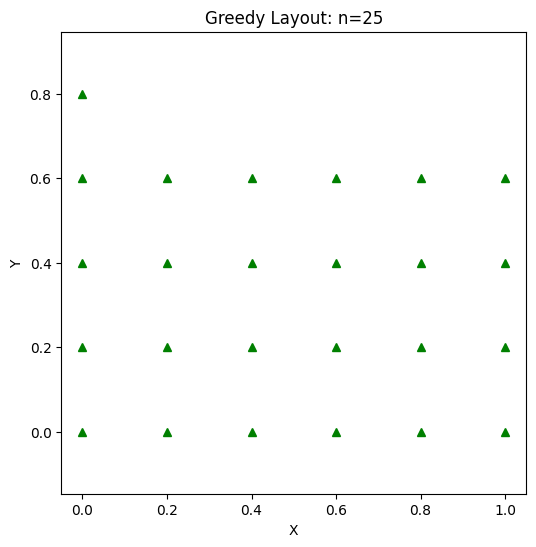

In [7]:
test_df = submission_df[submission_df["id"].str.startswith("25_")]
plot_trees(test_df, "Greedy Layout: n=25")